# Project Title - Indian Food Analysis


In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
# Change this
dataset_url = 'https://www.kaggle.com/nehaprabhavalkar/indian-food-101/download' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: naren951
Your Kaggle Key: ········


100%|██████████| 6.79k/6.79k [00:00<00:00, 118kB/s]

The dataset has been downloaded and extracted.

In [4]:
# Change this
data_dir = './indian-food-101'

In [5]:
import os
os.listdir(data_dir)

['indian_food.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "indian-food-analysis" 

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "narendiran-work/indian-food-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/narendiran-work/indian-food-analysis


'https://jovian.ml/narendiran-work/indian-food-analysis'

## Data Preparation and Cleaning

**TODO** - Write some explanation here.



> Instructions (delete this cell):
>
> - Load the dataset into a data frame using Pandas
> - Explore the number of rows & columns, ranges of values etc.
> - Handle missing, incorrect and invalid data
> - Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

In [10]:
import pandas as pd
import numpy as np

In [11]:
df_food= pd.read_csv('indian-food-101/indian_food.csv')
df_food

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central


In [12]:
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [13]:
df_food.describe()

,prep_time,cook_time
count,255.000000,255.000000
mean,31.105882,34.529412
std,72.554409,48.265650
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


In [14]:
df_food.columns

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'],
      dtype='object')

In [15]:
df_food.shape

(255, 9)

In [16]:
df_food=df_food[(df_food.flavor_profile!="-1")]
df_food=df_food[(df_food.prep_time>0)]
df_food=df_food[(df_food.cook_time>0)]
df_food=df_food[(df_food.state!="-1")]
df_food

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East
...,...,...,...,...,...,...,...,...,...
247,Prawn malai curry,"Coconut milk, prawns, garlic, turmeric, sugar",non vegetarian,15,50,spicy,main course,West Bengal,East
249,Shukto,"Green beans, bitter gourd, ridge gourd, banana...",vegetarian,10,20,spicy,main course,West Bengal,East
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West


In [17]:
import jovian

In [18]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "narendiran-work/indian-food-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/narendiran-work/indian-food-analysis


'https://jovian.ml/narendiran-work/indian-food-analysis'

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [19]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

<AxesSubplot:xlabel='diet', ylabel='cook_time'>

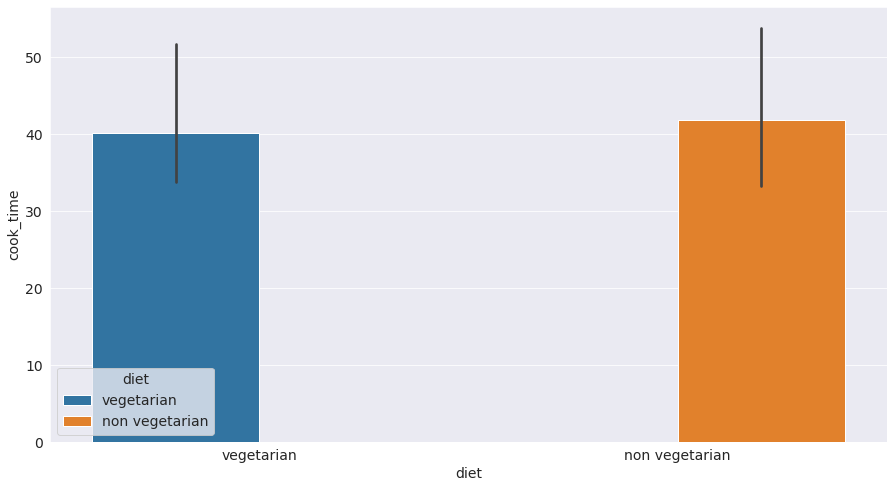

In [20]:
sns.barplot(df_food.diet,df_food.cook_time,hue=df_food.diet)

On average it takes more time to cook Non-Vegetarian dishes than Vegetarian Indian dishes

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

In [21]:
x=df_food.groupby('flavor_profile').count()['name']
x=np.array(x)
y=df_food.flavor_profile.unique()
y.sort()

Text(0.5, 0, 'No. of Dishes')

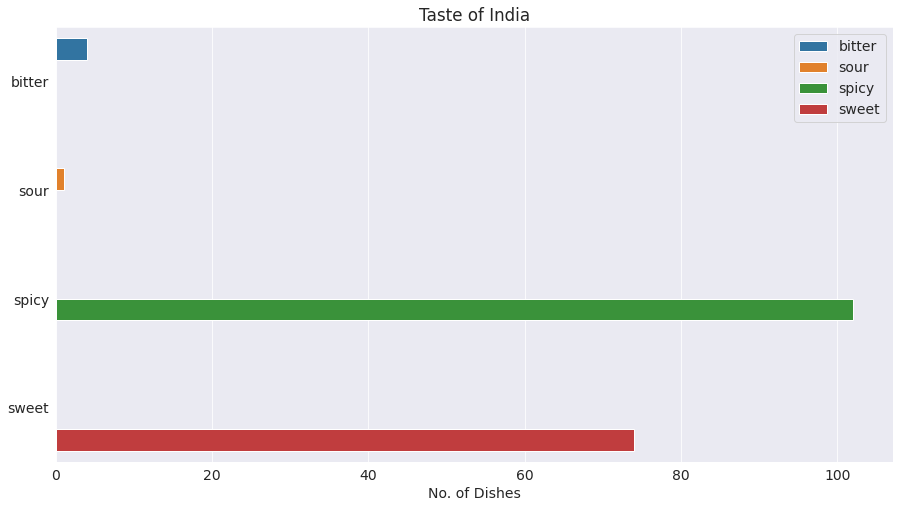

In [22]:
sns.barplot(x,y,hue=y)
plt.title("Taste of India")
plt.xlabel("No. of Dishes")

Indian food mainly consist of Sweet and Spicy dishes.

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

Text(0.5, 1.0, 'StateWise distribution')

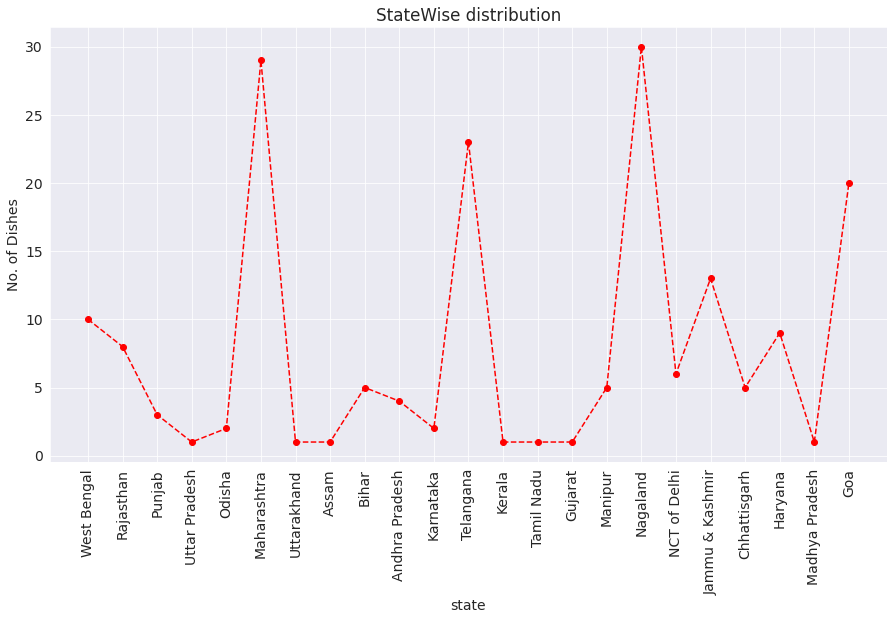

In [23]:
plt.plot(df_food.state.unique(),np.array(df_food.groupby('state').count()['name']),"o--r")
plt.xticks(rotation="vertical")
plt.xlabel("state")
plt.ylabel("No. of Dishes")
plt.title("StateWise distribution")

Nagaland and Maharashtra contribute to the most number of dishes in our dataset.

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

([<matplotlib.patches.Wedge at 0x7feaccf5b550>,
 [Text(0.365237151800956, 1.037594247740573, 'dessert'),
  Text(-0.7945086309263422, -0.7607601694249966, 'main course'),
  Text(0.9635692225319717, -0.5305981091081382, 'snack'),
  Text(1.0993372943506643, -0.03817739186692963, 'starter')])

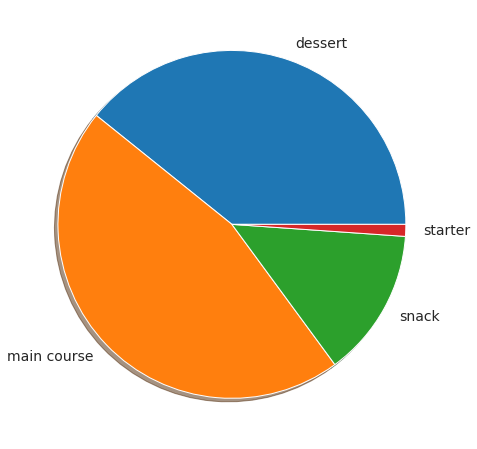

In [24]:
x=np.array(df_food.groupby('course').count()['name'])
y=df_food.course.unique()
y.sort()
plt.pie(x,labels=y,shadow=True)

In India ,Desserts are a main part of people's diet , this can also be the reason why there are main people who suffer from sugar and diabetes.

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

<AxesSubplot:xlabel='diet', ylabel='prep_time'>

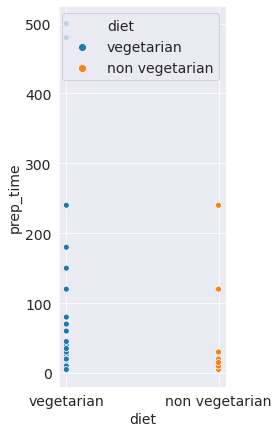

In [25]:
matplotlib.rcParams['figure.figsize'] = (3, 7)
sns.scatterplot(df_food.diet,df_food.prep_time,hue=df_food.diet)

Here,the number of vegetarian and non-vegetarian dishes are not equal but Non-Vegetarian dishes take more time to prepare the ingredient before the cooking even starts.

Let us save and upload our work to Jovian before continuing

In [26]:
import jovian

In [27]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "narendiran-work/indian-food-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/narendiran-work/indian-food-analysis


'https://jovian.ml/narendiran-work/indian-food-analysis'

## Asking and Answering Questions

TODO - write some explanation here.



> Instructions (delete this cell)
>
> - Ask at least 5 interesting questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does



#### Q1: What are the Top 5 dishes that take the most time to cook.

In [28]:
df=df_food.sort_values(by="cook_time",ascending=False)

In [29]:
df.head(5)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
62,Shrikhand,"Curd, sugar, saffron, cardamom",vegetarian,10,720,sweet,dessert,Maharashtra,West
27,Malapua,"Yoghurt, refined flour, ghee, fennel seeds",vegetarian,10,120,sweet,dessert,Bihar,North
114,Pindi chana,"Fennel, tea bags, tomato, kasuri methi, cinnamon",vegetarian,500,120,spicy,main course,Punjab,North
75,Biryani,"Chicken thighs, basmati rice, star anise, swee...",non vegetarian,30,120,spicy,main course,Telangana,South
142,Kuzhakkattai,"Sesame oil, raw rice, jaggery, grated coconut",vegetarian,10,90,spicy,main course,Tamil Nadu,South


In [30]:
df['name'].head(5)

62        Shrikhand
27          Malapua
114     Pindi chana
75          Biryani
142    Kuzhakkattai
Name: name, dtype: object

Here we see that delicious sweets take more the to cook.

#### Q2: What are the Top 5 dishes that take the most time to prepare and cook.

In [31]:
df=pd.DataFrame()
df['name']=df_food.name
df['cook time + prep time']=df_food.prep_time + df_food.cook_time
df['flavor profile']=df_food.flavor_profile
df=df.sort_values(by='cook time + prep time',ascending=False)

In [32]:
df.head(5)

,name,cook time + prep time,flavor profile
62,Shrikhand,730,sweet
114,Pindi chana,620,spicy
29,Misti doi,510,sweet
48,Poornalu,300,sweet
66,Chak Hao Kheer,285,sweet


Here also we see that sweets take the most time to prepare and cook

#### Q3: What is the list of ingredients used and what the count of the number of ingredients

In [33]:
ing=pd.DataFrame()
ing=df_food['ingredients']
ing_new=pd.DataFrame()
ing_new['ings']=['']
for i in ing:
    ing_new['ings']+=i
ingredients=ing_new['ings']
ingredients=ingredients.unique()
ingredients=ingredients[0].split(",")
ingredients

['Maida flour',
 ' yogurt',
 ' oil',
 ' sugarGram flour',
 ' ghee',
 ' sugarCarrots',
 ' milk',
 ' sugar',
 ' ghee',
 ' cashews',
 ' raisinsFlour',
 ' ghee',
 ' kewra',
 ' milk',
 ' clarified butter',
 ' sugar',
 ' almonds',
 ' pistachio',
 ' saffron',
 ' green cardamomMilk powder',
 ' plain flour',
 ' baking powder',
 ' ghee',
 ' milk',
 ' sugar',
 ' water',
 ' rose waterSugar syrup',
 ' lentil flourMaida',
 ' corn flour',
 ' baking soda',
 ' vinegar',
 ' curd',
 ' water',
 ' turmeric',
 ' saffron',
 ' cardamomMilk',
 ' cottage cheese',
 ' sugarYogurt',
 ' milk',
 ' nuts',
 ' sugarFirm white pumpkin',
 ' sugar',
 ' kitchen lime',
 ' alum powderRice',
 ' sugar',
 ' nutsCondensed milk',
 ' sugar',
 ' spices',
 ' nutsSemolina',
 ' ghee',
 ' nuts',
 ' milkKhoa',
 ' coconut',
 ' molu leafCorn flour',
 ' ghee',
 ' dry fruitsChhena',
 ' sugar',
 ' gheeSugar',
 ' chenna cheeseFlour',
 ' cream',
 ' sugar',
 ' saffron',
 ' lemon juice',
 ' coconut flakesChenna',
 ' condensed milk',
 ' sugar',
 

In [34]:
len(ingredients)

622

Indian cuisine has various ingredients and is known for the variety of Spices

#### Q4: Show the list of Non-vegetarian dishes and the ratio of veg and non-veg dishes to the total no. of dishes

In [35]:
df_diet=pd.DataFrame()
df_diet=df_food[['name','diet']]
print((df_diet[(df_diet.diet=="non vegetarian")])['name'])
len(df_diet[(df_diet.diet=="non vegetarian")])

64               Maach Jhol
67                    Galho
75                  Biryani
76           Butter chicken
79           Chicken razala
80     Chicken Tikka masala
81            Chicken Tikka
122        Tandoori Chicken
123     Tandoori Fish Tikka
137                Beef Fry
163         Chicken Varuval
211                Vindaloo
225              Alu Pitika
226             Masor tenga
232     Chingri malai curry
235                Haq Maas
247       Prawn malai curry
Name: name, dtype: object


17

In our dataset we have a very little number of non vegetarian dishes , we can say that this dataset is little biased to only vegetarian dishes

#### Q5: Find out the Dishes from each region and plot a pie chart to analysis the Data.

region
Central        3
East          25
North         45
North East    10
South         37
West          60
Name: diet, dtype: int64


([<matplotlib.patches.Wedge at 0x7feaccf27970>,
 [Text(1.0984924880728215, 0.05756955486697999, 'Central'),
  Text(0.9428840158906806, 0.5665419071682722, 'East'),
  Text(-0.20988994574363815, 1.079789891912187, 'North'),
  Text(-1.0049000250498075, 0.4474102587725236, 'North East'),
  Text(-1.012555313870509, -0.4298043000629415, 'South'),
  Text(0.5500000929077737, -0.9526278905225484, 'West')])

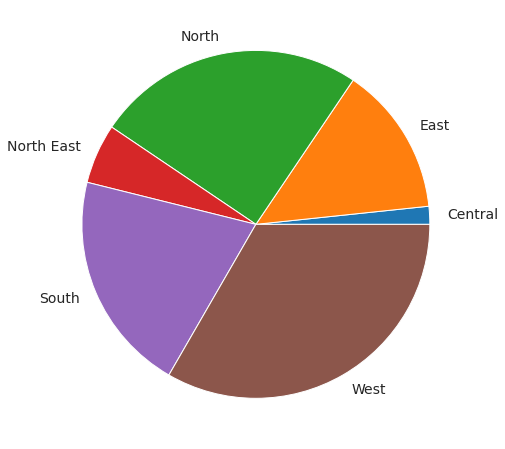

In [36]:
matplotlib.rcParams['figure.figsize'] = (15, 8)
n=df_food.groupby(df_food.region)['diet'].count()
print(n)
plt.pie(np.array(n),labels=n.index)

Let us save and upload our work to Jovian before continuing.

In [37]:
import jovian

In [38]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "narendiran-work/indian-food-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/narendiran-work/indian-food-analysis


'https://jovian.ml/narendiran-work/indian-food-analysis'

## Inferences and Conclusion

From the above analysis we can learn many things about Indian food.
Sweets are a major part of Indian diet.
Many Non-Vegetarian Dishes are not included in the dataset which makes it hard to analysis.
Indian food is made up of a variety of spieces which are not found in many countries.
Some Indian dishes take a lot of preparation before they are even cooked.
Over different regions we find various types of food.


Seaborn, Mathplotlib , Numpy , Pandas are very useful to analysis data
Jovian.ml has made very informative video that are very useful

In [43]:
import jovian

In [44]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "narendiran-work/indian-food-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/narendiran-work/indian-food-analysis


'https://jovian.ml/narendiran-work/indian-food-analysis'

## References and Future Work

In the future we can add more Non-Vegetarian dishes and add more information about ingredients.
we can also add the calories in each dish and make analysis on that data.

In [45]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
